Dataset sacado de: https://www.kaggle.com/datasets/oddrationale/mnist-in-csv

In [91]:
#Importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [92]:
#Importando datasets y transformandolos en DataFrames

df = pd.read_csv(r'../TemporalMLStuff/Datasets/mnist_train.csv')
df_test = pd.read_csv(r'../TemporalMLStuff/Datasets/mnist_test.csv')

df
#Hay una version más pequeña de 8x8

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='label', ylabel='count'>

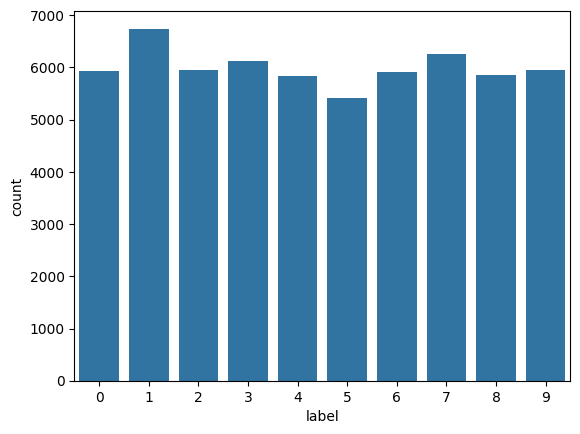

In [93]:
#Mirando como están distribuidas las clases
sns.countplot(data=df, x='label')

In [94]:
#Haciendo regresión logistica
X_train = df.drop('label', axis = 1)
y_train = df['label']

X_test = df_test.drop('label', axis = 1)
y_test = df_test['label']

#Estandarizando datos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=5000)
classifier.fit(X_train, y_train)


LogisticRegression(max_iter=5000, random_state=0)

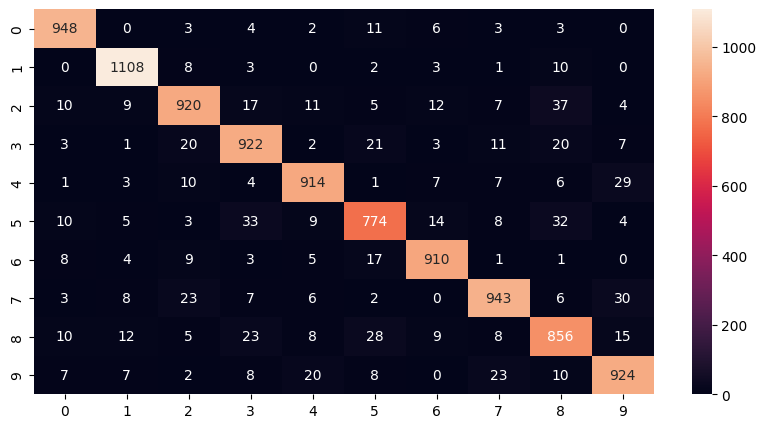

In [95]:
#Haciendo matriz de confusión y graficandola con un heatmap
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [96]:
#Calculando metricas de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.89      0.90      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.89      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.92      1028
           8       0.87      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



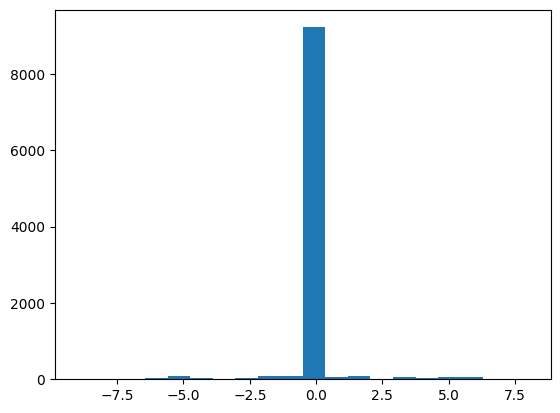

label
 0    9219
-2      93
 2      84
-5      80
-1      77
 5      70
 1      64
 3      51
 6      51
-3      46
-4      38
 4      37
-6      29
-7      17
 7      17
-8      17
-9       7
 8       3
Name: count, dtype: int64


In [97]:
y_pred = classifier.predict(X_test)
error = y_pred - y_test
plt.hist(error, bins=20)
plt.show()
print(error.value_counts())


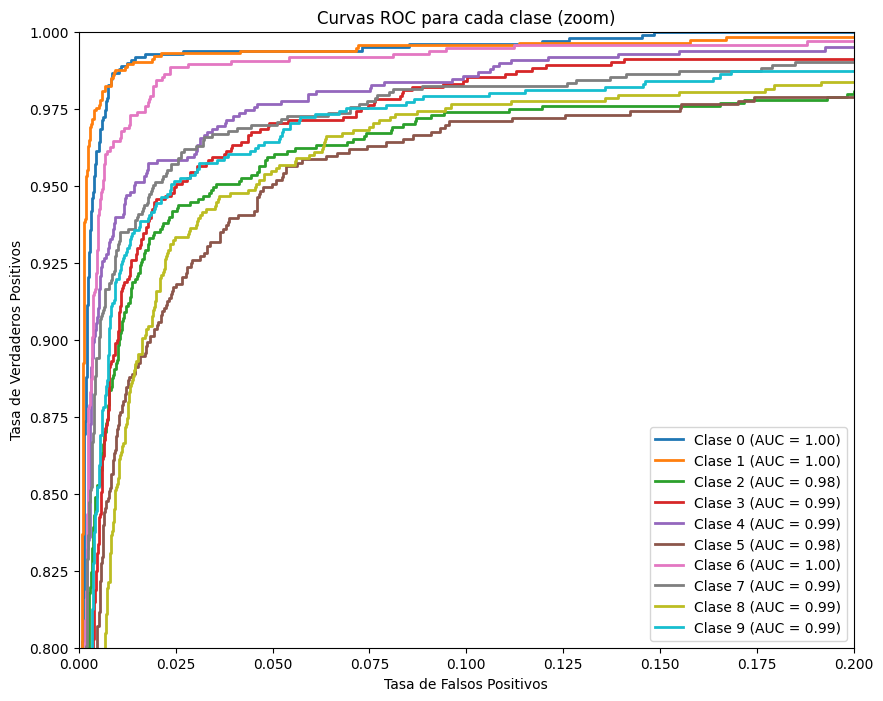

In [98]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarizar las etiquetas
y_test_bin = label_binarize(y_test, classes=range(10))

# Calcular las probabilidades de predicción
y_pred_proba = classifier.predict_proba(X_test)

# Calcular y graficar las curvas ROC para cada clase
plt.figure(figsize=(10, 8))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Clase %d (AUC = %0.2f)' % (i, roc_auc), linewidth=2)

plt.xlim([0.0, 0.2])
plt.ylim([0.8, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC para cada clase (zoom)')
plt.legend(loc="lower right")
plt.show()


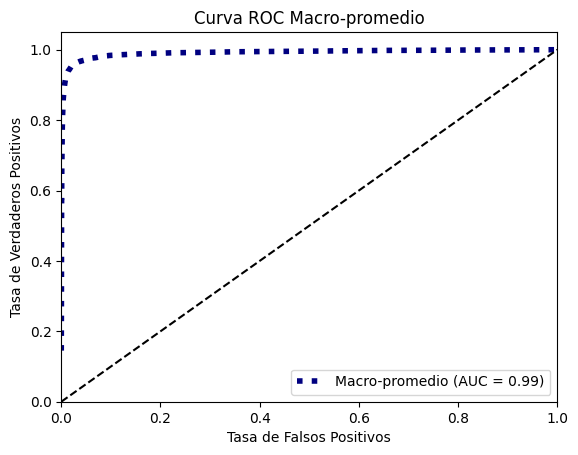

In [99]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarizar las etiquetas
y_test_bin = label_binarize(y_test, classes=range(10))

# Calcular las probabilidades de predicción
y_pred_proba = classifier.predict_proba(X_test)

# Calcular las tasas de verdaderos y falsos positivos para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular el promedio de las tasas de verdaderos y falsos positivos
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(10)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(10):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= 10

# Calcular el AUC de la curva ROC promediada
macro_roc_auc = auc(all_fpr, mean_tpr)

# Graficar la curva ROC promediada
plt.figure()
plt.plot(all_fpr, mean_tpr, label='Macro-promedio (AUC = %0.2f)' % macro_roc_auc, color='navy', linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Macro-promedio')
plt.legend(loc="lower right")
plt.show()

In [100]:
#Probando distintos algoritmos de clasificación con cross-validation
from sklearn.model_selection import StratifiedKFold # Se usan k-folds estratificados para mantener la proporcion de clases en cada fold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
LogisticRegression = LogisticRegression(penalty='l2', C=1, solver='lbfgs', max_iter=1000)
KNNeighbors = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree', p=1, weights='distance')
SVClassifier = SVC(kernel="linear", probability=True, C=0.1, degree=2, gamma="scale")

name_list = ["LogisticRegression", "KNNeighbors", "SVClassifier"]
name_index = 0

for model in [LogisticRegression, KNNeighbors, SVClassifier]:
    scores = {"average_f1_score": [], "average_accuracy": [], "average_roc_auc_score": []}
    for train_index, test_index in skf.split(X_train, y_train):
        X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_test_fold)
        
        if hasattr(model, "predict_proba"):
            y_pred_prob = model.predict_proba(X_test_fold)
            if y_pred_prob.shape[1] == 2:  # Binary classification
                y_pred_prob = y_pred_prob[:, 1]
            scores['average_roc_auc_score'].append(roc_auc_score(y_test_fold, y_pred_prob, multi_class="ovr"))
        else:
            scores['average_roc_auc_score'].append(np.nan)  # Handle models without predict_proba
        
        scores['average_f1_score'].append(f1_score(y_test_fold, y_pred, average="weighted"))
        scores['average_accuracy'].append(model.score(X_test_fold, y_test_fold))
    
    print(f"{name_list[name_index]}")
    name_index += 1
    for key in scores:
        print(f"{key}: {np.mean(scores[key])}")
    print("*********"*5)

LogisticRegression
average_f1_score: 0.9128867360386836
average_accuracy: 0.9130666666666667
average_roc_auc_score: 0.9906380434681503
*********************************************


KeyboardInterrupt: 

In [ ]:
# Encontrando los mejores parámetros para SVM
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
import numpy as np

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

# Initialize the SVM classifier
svm = SVC()

# Set up StratifiedKFold with a random seed for reproducibility
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Scoring methods
scoring_methods = ['accuracy', 'roc_auc', 'f1']

# Dictionary to store the scores for each parameter set
all_scores = {}

# Perform GridSearchCV for each scoring method
for score in scoring_methods:
    svm_cv = GridSearchCV(svm, param_grid, cv=skf, scoring=score)
    svm_cv.fit(X_train, y_train)
    for params, mean_score in zip(svm_cv.cv_results_['params'], svm_cv.cv_results_['mean_test_score']):
        params_tuple = tuple(params.items())
        if params_tuple not in all_scores:
            all_scores[params_tuple] = []
        all_scores[params_tuple].append(mean_score)

# Calculate the average score for each set of parameters
average_scores = {params: np.mean(scores) for params, scores in all_scores.items()}

# Find the parameters with the highest average score
best_params = max(average_scores, key=average_scores.get)
best_average_score = average_scores[best_params]

print(f"Best parameters: {dict(best_params)}")
print(f"Best average score: {best_average_score}")

In [ ]:
# Encontrando parametros optimos para KNN
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Define the parameter grid
param_grid = {
    'n_neighbors': np.arange(1, 100),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier()

# Set up StratifiedKFold with a random seed for reproducibility
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Scoring methods
scoring_methods = ['accuracy', 'roc_auc', 'f1']

# Dictionary to store the scores for each parameter set
all_scores = {}

# Perform GridSearchCV for each scoring method
for score in scoring_methods:
    knn_cv = GridSearchCV(knn, param_grid, cv=skf, scoring=score)
    knn_cv.fit(X, y)
    for params, mean_score in zip(knn_cv.cv_results_['params'], knn_cv.cv_results_['mean_test_score']):
        params_tuple = tuple(params.items())
        if params_tuple not in all_scores:
            all_scores[params_tuple] = []
        all_scores[params_tuple].append(mean_score)

# Calculate the average score for each set of parameters
average_scores = {params: np.mean(scores) for params, scores in all_scores.items()}

# Find the parameters with the highest average score
best_params = max(average_scores, key=average_scores.get)
best_average_score = average_scores[best_params]

print(f"Best parameters: {dict(best_params)}")
print(f"Best average score: {best_average_score}")